# Spotify Recommendations
### Goal is to recommend songs 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:\Python Project\Spotify Dataset\spotify\dataset.csv')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
data['track_genre'].value_counts(ascending=False)

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

In [5]:
data['track_genre'].nunique()

114

In [6]:
len(data[data['track_genre'] == 'hip-hop'])

1000

In [7]:
data.shape

(114000, 21)

Exploring Popularity

In [8]:
data['popularity'].describe()

count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

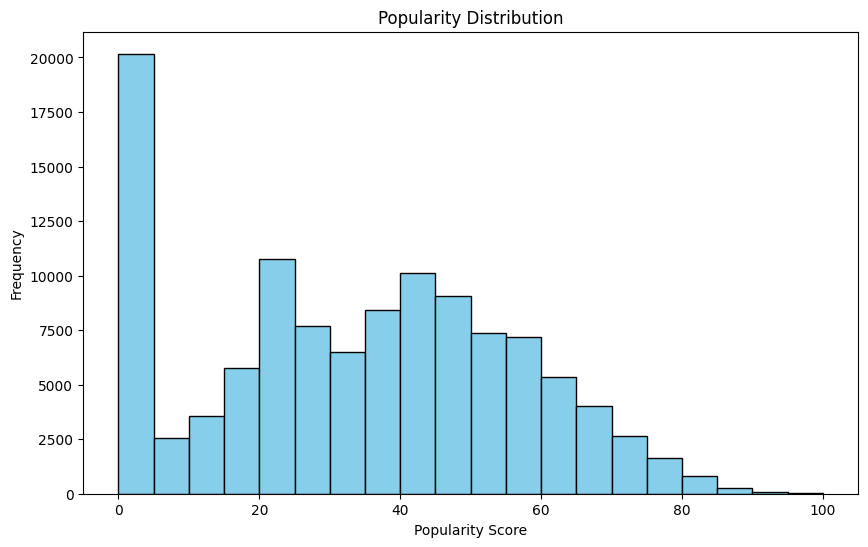

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(data['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Popularity Distribution')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

Seems to be roughly normally distributed outside of the extremely high frequency of 0. I will make the assumption that if song has a popularity of 0, we will not suggest it to them. Therefore, we can remove songs with the popularity of 0.

In [10]:
data = data[data['popularity'] != 0]
data.shape

(97980, 21)

In [11]:
#Removing Duplicate Songs as many songs on spotify can be found as singles and within an album
data = data.drop_duplicates(subset=['track_name', 'artists'])
data.shape

(76585, 21)

In [12]:
#I need to reduce the size of this dataset for my computer due to low RAM
#data = data.sample(n=10000).reset_index(drop=True)

In [98]:
#Finding Some songs I want suggestions of.

data[data['artists'] == "The Strokes"].head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2206,The Strokes,The New Abnormal,The Adults Are Talking,79,309053,False,0.593,0.749,5,-5.670,1,0.0475,0.011300,0.106000,0.3140,0.6490,164.959,4,alt-rock
2463,The Strokes,Comedown Machine,"Call It Fate, Call It Karma",72,204773,False,0.544,0.241,4,-14.779,0,0.0300,0.983000,0.774000,0.1010,0.3590,109.437,4,alt-rock
2554,The Strokes,The New Abnormal,Selfless,71,222093,False,0.538,0.679,4,-4.297,1,0.0333,0.191000,0.001750,0.0889,0.0888,121.990,4,alt-rock
2709,The Strokes,Is This It,Last Nite,74,193506,False,0.624,0.910,0,-5.703,1,0.0297,0.028500,0.000198,0.0789,0.7670,104.042,4,alt-rock
2763,The Strokes,Room On Fire,Reptilia,75,219826,False,0.489,0.649,9,-5.110,1,0.0336,0.000603,0.713000,0.1010,0.7700,158.009,4,alt-rock


Check the histogram of popularity once again.

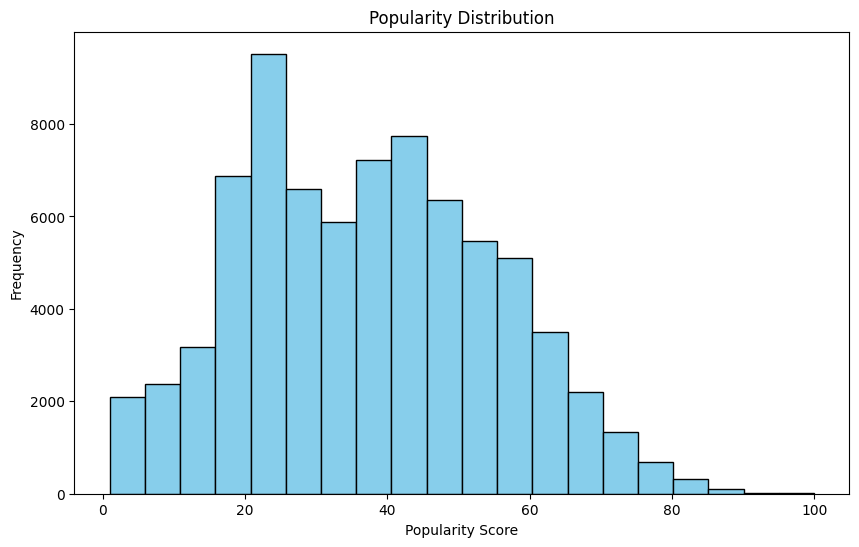

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(data['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Popularity Distribution')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

A little skewed right. We will Scale the numeric data later.

We can continue to delete irrelevant columns such as the unnamed column and the spotify id column. We will use the index to reference the data later.

In [15]:
data = data.drop(['Unnamed: 0', "track_id"], axis= 1)
data.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


I want to include the genre category in recommendation so I will use the TFidf Vectorizer function on the string text

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
data['track_genre'] = data['track_genre'].fillna("")
tfidf_vector = TfidfVectorizer() #max_features= 60, stop_words='english'
tfidf_matrix_genre = tfidf_vector.fit_transform(data['track_genre'])
tfidf_vector.get_feature_names_out()

array(['acoustic', 'afrobeat', 'age', 'alt', 'alternative', 'ambient',
       'and', 'anime', 'bass', 'black', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago', 'children', 'chill',
       'classical', 'club', 'comedy', 'country', 'dance', 'dancehall',
       'death', 'deep', 'detroit', 'disco', 'disney', 'drum', 'dub',
       'dubstep', 'edm', 'electro', 'electronic', 'emo', 'film', 'folk',
       'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth',
       'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard',
       'hardcore', 'hardstyle', 'heavy', 'hip', 'honky', 'hop', 'house',
       'idm', 'idol', 'indian', 'indie', 'industrial', 'iranian', 'jazz',
       'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal',
       'metalcore', 'minimal', 'mpb', 'music', 'new', 'opera', 'pagode',
       'party', 'piano', 'pop', 'power', 'progressive', 'psych', 'punk',
       'reggae', 'reggaeton', 'rock', 'rockabilly', 'roll', 'romance',
  

In [38]:
type(tfidf_matrix_genre)

scipy.sparse._csr.csr_matrix

Next, I will Scale the rest of my numeric data

In [39]:
data.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [40]:
selected_features = data[['popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']]

#Explicit is also a string so I can quickly dummy that variable
selected_features['explicit'] = selected_features['explicit'].astype(int)
selected_features

C:\Users\Ian Keller\AppData\Local\Temp\ipykernel_12816\407085388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['explicit'] = selected_features['explicit'].astype(int)


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [41]:
#Scaling Features
scaler = StandardScaler()
scaled_selected_numeric = scaler.fit_transform(selected_features)

In [42]:
type(scaled_selected_numeric)

numpy.ndarray

In [43]:
#Combining the numeric features with the genre data

#making a columns variable
scaled_columns = ['popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']

combined_matrix = pd.concat([pd.DataFrame(scaled_selected_numeric, columns = scaled_columns),
                             pd.DataFrame(tfidf_matrix_genre.toarray(), columns = tfidf_vector.get_feature_names_out())],
                             axis= 1)

In [44]:
combined_matrix.columns[15:]

Index(['acoustic', 'afrobeat', 'age', 'alt', 'alternative', 'ambient', 'and',
       'anime', 'bass', 'black',
       ...
       'swedish', 'synth', 'tango', 'techno', 'tonk', 'trance', 'trip',
       'tunes', 'turkish', 'world'],
      dtype='object', length=114)

In [45]:
combined_matrix.iloc[:, 15:].sum().sort_values(ascending=False)

pop            3211.229228
rock           2371.711978
metal          1960.619835
house          1646.523865
techno         1505.944034
                  ...     
soul            199.000000
alternative     176.000000
reggae          130.000000
jazz            111.000000
reggaeton        61.000000
Length: 114, dtype: float64

In [66]:
combined_matrix.shape

(76585, 129)

In [46]:
combined_matrix

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,swedish,synth,tango,techno,tonk,trance,trip,tunes,turkish,world
0,2.011123,-0.007229,-0.307652,0.648940,-0.702377,-1.204961,0.337091,-1.313820,0.450384,-0.866564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,1.002107,-0.702171,-0.307652,-0.804441,-1.858001,-1.204961,-1.685047,0.761139,-0.112822,1.792773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,1.114220,-0.177329,-0.307652,-0.702250,-1.101949,-1.486017,-0.238955,0.761139,-0.286765,-0.336367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1.899010,-0.253574,-0.307652,-1.678740,-2.274809,-1.486017,-1.931814,0.761139,-0.450576,1.736115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,2.515631,-0.279981,-0.307652,0.319658,-0.772890,-0.923905,-0.228737,0.761139,-0.312941,0.435968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76580,-0.903811,1.315960,-0.307652,-2.212404,-1.587702,-0.080737,-1.522721,0.761139,-0.400757,0.945888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
76581,-0.847755,1.315969,-0.307652,-2.201049,-2.049952,-1.486017,-1.893835,-1.313820,-0.418489,2.001512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
76582,-0.847755,0.342574,-0.307652,0.382108,-1.219470,-1.486017,-0.462780,-1.313820,-0.402446,1.622800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
76583,0.217318,0.449118,-0.307652,0.143663,-0.526096,0.481375,-0.461624,0.761139,-0.506306,0.173553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107


### Building Recommender
The above code helped me think through how I will create the recommender, below I will began creating the model.

First, I will test the recommendations using the TFIDF to identify the genre of a song as many genres are similar as seen in EDA. For example, "pop" and "power-pop" are seperate genres, TFIDF will also assign a single genre name into multiple genres which may be nice for similar genres.

In [67]:
#First I will need to combine the TFIDF info will the full data frame
data_full = pd.concat([data, pd.DataFrame(tfidf_matrix_genre.toarray(), columns=tfidf_vector.get_feature_names_out())], axis=1)
data_full = data_full[data_full['track_name'].notna()]
data_full = data_full.drop('track_genre', axis =1)
data_full.shape

(76585, 132)

Checking our TFIDF genre categories... Seems to have done the trick in combining similar genres.

In [81]:
data_full.iloc[:, 19:].sum().sort_values(ascending=False)

pop          1846.515828
metal        1791.071073
rock         1521.166281
house        1401.053654
bluegrass     928.000000
                ...     
age            82.024387
new            82.024387
psych          79.464282
sleep          69.000000
reggaeton      54.000000
Length: 113, dtype: float64

In [83]:
for i, column_name in enumerate(data_full.columns):
    print(f"{i}, Col Name: {column_name}")

0, Col Name: artists
1, Col Name: album_name
2, Col Name: track_name
3, Col Name: popularity
4, Col Name: duration_ms
5, Col Name: explicit
6, Col Name: danceability
7, Col Name: energy
8, Col Name: key
9, Col Name: loudness
10, Col Name: mode
11, Col Name: speechiness
12, Col Name: acousticness
13, Col Name: instrumentalness
14, Col Name: liveness
15, Col Name: valence
16, Col Name: tempo
17, Col Name: time_signature
18, Col Name: acoustic
19, Col Name: afrobeat
20, Col Name: age
21, Col Name: alt
22, Col Name: alternative
23, Col Name: ambient
24, Col Name: and
25, Col Name: anime
26, Col Name: bass
27, Col Name: black
28, Col Name: bluegrass
29, Col Name: blues
30, Col Name: brazil
31, Col Name: breakbeat
32, Col Name: british
33, Col Name: cantopop
34, Col Name: chicago
35, Col Name: children
36, Col Name: chill
37, Col Name: classical
38, Col Name: club
39, Col Name: comedy
40, Col Name: country
41, Col Name: dance
42, Col Name: dancehall
43, Col Name: death
44, Col Name: deep
45,

Here we see the engineered genres start in column 18

### Creaing the Function to recommend songs based on our dataframe with TFIDF info.

In [103]:
#hard-coding
#song_title = "Is This It"

num_non_genre_cols = ['popularity', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature']

def tfidf_recommender(song_title):
    #First we need to subset the data based on tfidf genre breakdown

    #Finding the Song Genre Characteristics
    song_index = data_full[data_full['track_name'] == song_title].index[0]
    #Creating a list of genres in which the song relates to
    song_genres = data_full.loc[song_index][18:].sort_values(ascending = False)
    #Grabbing genre information and sorting into a variables
    genre_list = [i for i in song_genres.index if song_genres.loc[i] > 0]
    #Subsetting data based on genres, resetting index, and removing TFIDF features for better similiarty scores.
    subset_data = data_full[data_full.loc[:, genre_list].sum(axis=1) > 0]
    subset_data = subset_data.reset_index(drop=True)
    subset_data = subset_data.iloc[: , :18].dropna(subset=['track_name'])
    
    
    #Only Considering numeric values of subset
    numeric = subset_data.select_dtypes(include="number")

    #Scaling Subset
    numeric_scaled = scaler.fit_transform(numeric)
   
    #Creating Similarity Matrix
    cos_sim = cosine_similarity(numeric_scaled, numeric_scaled)
    #locating song index
    song_index = subset_data[subset_data['track_name'] == song_title].index[0]
    #Gathering similarity scores
    sim_scores = list(enumerate(cos_sim[song_index]))
    #Sorting Similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_similar_indices = [i[0] for i in sim_scores[1:11]]  # Exclude the input song itself
    
    recommendations = subset_data.loc[top_similar_indices, ['track_name', 'artists']]
    #Adding Similarity score to df
    recommendations['Similarity Score'] = [i[1] for i in sim_scores[1:11]]
    recommendations = recommendations[['track_name', "artists", "Similarity Score"]]

    return recommendations

In [102]:
tfidf_recommender("Is This It")

,track_name,artists,Similarity Score
931,Valerie - Glee Cast Version,Glee Cast,0.897481
971,Tiro,Arca,0.874966
2042,Science Fiction,Arctic Monkeys,0.862095
1438,Last Christmas,Glee Cast,0.858577
544,ParadoXXX Invasion,ENHYPEN,0.855894
1365,Raise Your Glass (feat. Darren Criss),Glee Cast;Darren Criss,0.852853
1817,Someday,The Strokes,0.843488
1759,Figa de Guiné,Mc Tha;Comunidade Jongo Dito Ribeiro,0.833964
533,Make the change,ENHYPEN,0.832063
684,Canzoni preferite,Yugo Kanno,0.825449


### I want to make the recommender more specific, only recommending songs within the exact same genre
 Here we will no longer need to use tfidf to convert genre text into integers

In [104]:
#hard-coding song title
#song_title = "Is This It"

def genre_recommend(song_title):
    #Finding the song genre
    song_genre = data[data['track_name'] == song_title]['track_genre'].iloc[0]
    
    #Filtering the data based on genre
    data_subset = data[data['track_genre'] == song_genre]
    #Resetting the index
    data_subset = data_subset.reset_index(drop=True)
    
    #Only Considering numeric values of subset
    numeric = data_subset.select_dtypes(include="number")
    
    #Scaling Subset
    numeric_scaled = scaler.fit_transform(numeric)
   
    #Creating Similarity Matrix
    cos_sim = cosine_similarity(numeric_scaled, numeric_scaled)
    #locating song index
    song_index = data_subset[data_subset['track_name'] == song_title].index[0]
    #Gathering similarity scores
    sim_scores = list(enumerate(cos_sim[song_index]))
    #Sorting Similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_similar_indices = [i[0] for i in sim_scores[1:11]]  # Exclude the input song itself
    
    recommendations = data_subset.loc[top_similar_indices, ['track_name', 'artists']]
    #Adding Similarity score to df
    recommendations['Similarity Score'] = [i[1] for i in sim_scores[1:11]]
    recommendations = recommendations[['track_name', "artists", "Similarity Score"]]

    return recommendations

In [105]:
genre_recommend("Is This It")

,track_name,artists,Similarity Score
587,Something New,Babe Rainbow,0.790234
41,Someday,The Strokes,0.779021
3,Why'd You Only Call Me When You're High?,Arctic Monkeys,0.778501
435,Shy,Hether,0.772509
223,Black Memories,The Growlers,0.753455
266,Science Fiction,Arctic Monkeys,0.739707
98,$10,Good Morning,0.713811
628,Surfin' Bird,The Trashmen,0.707717
4,Homage,Mild High Club,0.705577
718,Suddenly,Drugdealer;Weyes Blood,0.704653


It seems the first recommender system worked the best based on similarity score. Although, anecdotally the specifc genre based version seems to be a better fit based on my knowledge of music.

### Creating a Widget for the Recommendations

Currently, we get some interesting suggestions for similar songs but it is a little tough to use as you have to input the precise song name and many song names may have different artists. To counteract that I will make a search widget within Python.